In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  

In [3]:
mnist = input_data.read_data_sets('data/', one_hot=True)
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz


In [9]:
# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 256 # 2nd layer num features
n_input    = 784 # MNIST data input (img shape: 28*28)
n_output   = 784 # 

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_output])
dropout_keep_prob = tf.placeholder("float")

h1_w = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
h2_w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
out_w = tf.Variable(tf.random_normal([n_hidden_2, n_output]))
h1_b = tf.Variable(tf.random_normal([n_hidden_1]))
h2_b = tf.Variable(tf.random_normal([n_hidden_2]))
out_b = tf.Variable(tf.random_normal([n_output]))

layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, h1_w), h1_b)) 
layer_1out = tf.nn.dropout(layer_1, dropout_keep_prob) 
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1out, h2_w), h2_b)) 
layer_2out = tf.nn.dropout(layer_2, dropout_keep_prob) 
out = tf.nn.sigmoid(tf.matmul(layer_2out, out_w) + out_b)
cost = tf.reduce_mean(tf.pow(out-y, 2))

Epoch: 000/050 cost: 0.107209882


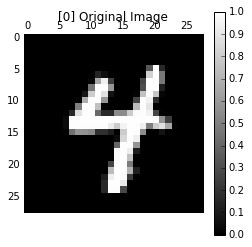

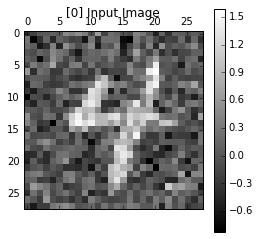

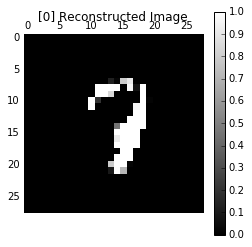

Epoch: 001/050 cost: 0.080909671
Epoch: 002/050 cost: 0.062781154
Epoch: 003/050 cost: 0.048868396
Epoch: 004/050 cost: 0.038133229
Epoch: 005/050 cost: 0.033260822
Epoch: 006/050 cost: 0.031073477
Epoch: 007/050 cost: 0.029650253
Epoch: 008/050 cost: 0.028575739
Epoch: 009/050 cost: 0.027811487
Epoch: 010/050 cost: 0.027185846


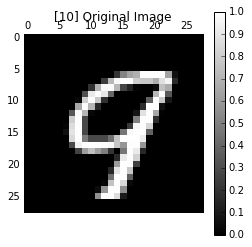

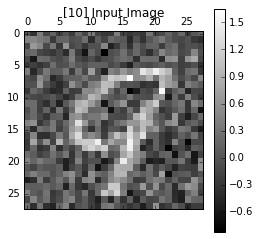

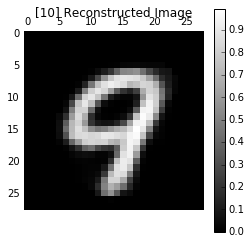

Epoch: 011/050 cost: 0.026647688
Epoch: 012/050 cost: 0.026198138
Epoch: 013/050 cost: 0.025670082
Epoch: 014/050 cost: 0.025322322
Epoch: 015/050 cost: 0.025010383
Epoch: 016/050 cost: 0.024734055
Epoch: 017/050 cost: 0.024453293
Epoch: 018/050 cost: 0.024365321
Epoch: 019/050 cost: 0.024096529
Epoch: 020/050 cost: 0.023894693


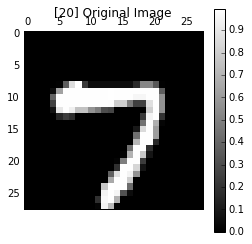

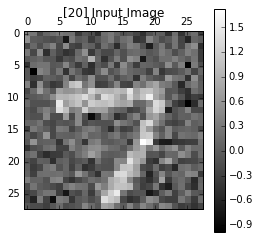

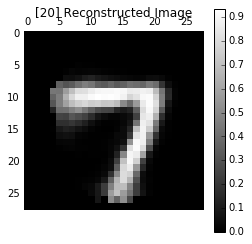

Epoch: 021/050 cost: 0.023738276
Epoch: 022/050 cost: 0.023596309
Epoch: 023/050 cost: 0.023413328
Epoch: 024/050 cost: 0.023347452
Epoch: 025/050 cost: 0.023183288
Epoch: 026/050 cost: 0.022949292
Epoch: 027/050 cost: 0.022905318
Epoch: 028/050 cost: 0.022808062
Epoch: 029/050 cost: 0.022664196
Epoch: 030/050 cost: 0.022543282


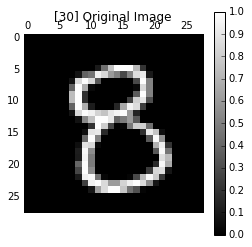

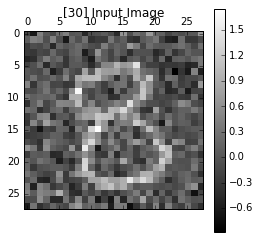

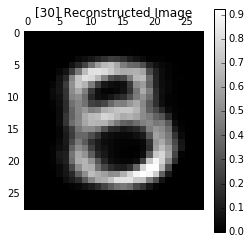

Epoch: 031/050 cost: 0.022471481
Epoch: 032/050 cost: 0.022438365
Epoch: 033/050 cost: 0.022359116
Epoch: 034/050 cost: 0.022268118
Epoch: 035/050 cost: 0.022225825
Epoch: 036/050 cost: 0.022085602
Epoch: 037/050 cost: 0.022114727
Epoch: 038/050 cost: 0.022038249
Epoch: 039/050 cost: 0.021979963
Epoch: 040/050 cost: 0.021841226


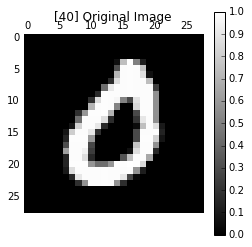

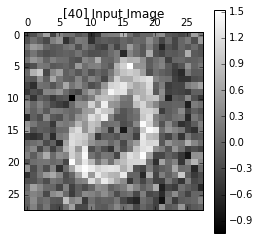

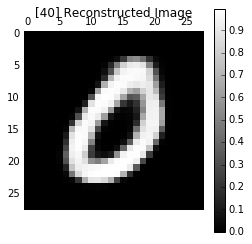

Epoch: 041/050 cost: 0.021798750
Epoch: 042/050 cost: 0.021854510
Epoch: 043/050 cost: 0.021680922
Epoch: 044/050 cost: 0.021713079
Epoch: 045/050 cost: 0.021628278
Epoch: 046/050 cost: 0.021584444
Epoch: 047/050 cost: 0.021508773
Epoch: 048/050 cost: 0.021450840
Epoch: 049/050 cost: 0.021413994
Optimization Finished!


In [10]:
# Training
learning_rate   = 0.01
training_epochs = 50
batch_size      = 100
display_step    = 1
plot_step       = 10

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer
init = tf.initialize_all_variables()

# Saver
savedir = "nets/"
saver = tf.train.Saver(max_to_keep=training_epochs) 

# Launch the graph
sess = tf.Session()

# Training 
sess.run(init)

for epoch in range(training_epochs):
    avg_cost = 0.
    num_batch = int(mnist.train.num_examples/batch_size)
    # Loop over all batches
    for i in range(num_batch): 
        randidx = np.random.randint(trainimg.shape[0], size=batch_size)
        batch_xs = trainimg[randidx, :]
        batch_xs_noisy = batch_xs + 0.3*np.random.randn(batch_xs.shape[0], 784)

        batch_ys = trainlabel[randidx, :]                

        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_xs_noisy, y: batch_xs, dropout_keep_prob: 0.5})
        # Compute average loss
        avg_cost += sess.run(cost, feed_dict={x: batch_xs_noisy, y: batch_xs, dropout_keep_prob: 1})/num_batch

    # Display logs per epoch step
    if epoch % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
    if epoch % plot_step == 0:
        # Test one
        randidx  = np.random.randint(testimg.shape[0], size=1)
        testvec  = testimg[randidx, :]
        noisyvec = testvec + 0.3*np.random.randn(1, 784)
        outvec   = sess.run(out, feed_dict={x: testvec, dropout_keep_prob: 1.})
        outimg   = np.reshape(outvec, (28, 28))

        # Plot 
        plt.matshow(np.reshape(testvec, (28, 28)), cmap=plt.get_cmap('gray'))
        plt.title("[" + str(epoch) + "] Original Image")
        plt.colorbar()

        plt.matshow(np.reshape(noisyvec, (28, 28)), cmap=plt.get_cmap('gray'))
        plt.title("[" + str(epoch) + "] Input Image")
        plt.colorbar()

        plt.matshow(outimg, cmap=plt.get_cmap('gray'))
        plt.title("[" + str(epoch) + "] Reconstructed Image")
        plt.colorbar()
        plt.show()

        saver.save(sess, savedir + 'dae_dr.ckpt', global_step=epoch)
print ("Optimization Finished!")

In [12]:
# Restore
epoch = 40
saver.restore(sess, "nets/dae_dr.ckpt-" + str(epoch))

label is 2
Gaussian Noise
Salt and Pepper Noise


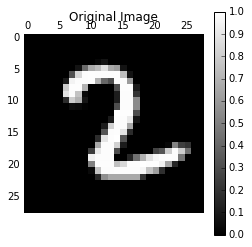

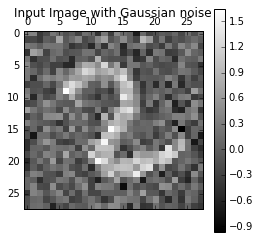

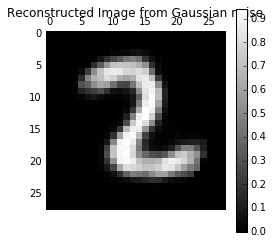

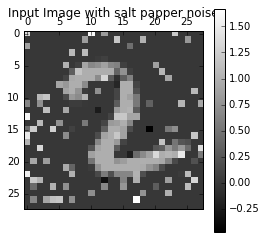

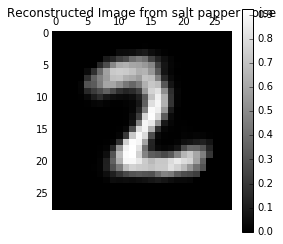

In [14]:
# Test one
randidx   = np.random.randint(testimg.shape[0], size=1)
orgvec    = testimg[randidx, :]
testvec   = testimg[randidx, :]
label     = np.argmax(testlabel[randidx, :], 1)

print ("label is %d" % (label)) 

print ("Gaussian Noise")
noisyvec_gauss = testvec + 0.3*np.random.randn(1, 784)
   
print ("Salt and Pepper Noise")
noisyvec_saltpapper = testvec
rate     = 0.15
noiseidx = np.random.randint(testimg.shape[1], size=int(testimg.shape[1]*rate))
noisyvec_saltpapper[0, noiseidx] = 1-noisyvec[0, noiseidx]

outvec_gauss   = sess.run(out, feed_dict={x: noisyvec_gauss, dropout_keep_prob: 1})
outimg_gauss   = np.reshape(outvec_gauss, (28, 28))

outvec_saltpapper   = sess.run(out, feed_dict={x: noisyvec_saltpapper, dropout_keep_prob: 1})
outimg_saltpapper   = np.reshape(outvec_saltpapper, (28, 28))

# Plot 
plt.matshow(np.reshape(orgvec, (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("Original Image")
plt.colorbar()

plt.matshow(np.reshape(noisyvec_gauss, (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("Input Image with Gaussian noise")
plt.colorbar()

plt.matshow(outimg_gauss, cmap=plt.get_cmap('gray'))
plt.title("Reconstructed Image from Gaussian noise")
plt.colorbar()
plt.show()

plt.matshow(np.reshape(noisyvec_saltpapper, (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("Input Image with salt papper noise")
plt.colorbar()

plt.matshow(outimg_saltpapper, cmap=plt.get_cmap('gray'))
plt.title("Reconstructed Image from salt papper noise")
plt.colorbar()
plt.show()